In [4]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
earth_strikes = pd.read_csv("../CSV_MASTERS/GeoEarth_with_num_strikes")
earth_strikes.tail()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,country,adm0_a3,...,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry,num_strikes
120,1.0,Admin-0 country,2.0,Papua New Guinea,PNG,0.0,2.0,Sovereign country,Papua New Guinea,PNG,...,Melanesia,East Asia & Pacific,16.0,16.0,6.0,-99.0,1.0,PNG.geojson,MULTIPOLYGON (((153.5361328125 -11.47617187499...,3.0
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antarctica,NaN,...,Antarctica,Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22511.0
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Sudan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eswatini,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reunion,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
earth_strikes.loc[121, "subregion"] = "Antarctica"
earth_strikes.loc[121, "region_wb"] = "Antarctica"
earth_strikes.tail()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,country,adm0_a3,...,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry,num_strikes
120,1.0,Admin-0 country,2.0,Papua New Guinea,PNG,0.0,2.0,Sovereign country,Papua New Guinea,PNG,...,Melanesia,East Asia & Pacific,16.0,16.0,6.0,-99.0,1.0,PNG.geojson,MULTIPOLYGON (((153.5361328125 -11.47617187499...,3.0
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antarctica,NaN,...,Antarctica,Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22511.0
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Sudan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eswatini,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reunion,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [10]:
region = list(earth_strikes.region_wb.unique())

samples = []

for r in region:
    samples.append(earth_strikes[earth_strikes.region_wb == r].num_strikes)


alpha_list = (0.1, 0.05, 0.01) # the different alpha levels to test    
test_results = []
for i in range(len(samples)):
    for j in range(i + 1, len(samples)):
        samp1, samp2 = samples[i], samples[j]
        t_stat, p_value = ttest_ind(samp1, samp2, equal_var=False)
        alpha_1, alpha_05, alpha_01 = (p_value < alpha_list[0],p_value < alpha_list[1], p_value < alpha_list[2])
        test_results.append((region[i], region[j], t_stat, p_value, alpha_1, alpha_05, alpha_01))
        
region_srikes = pd.DataFrame(test_results, columns=["Region 1", "Region 2", "t-stat", "p-value", "alpha 10%", "alpha 5%", "alpha 1%"])

region_srikes.dropna().to_csv('../CSV_MASTERS/region_stats.csv')

/home/qdizon/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/qdizon/.local/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/qdizon/.local/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/qdizon/.local/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/qdizon/.local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/qdizon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


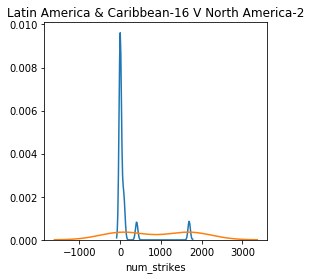

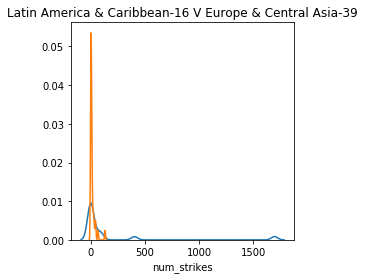

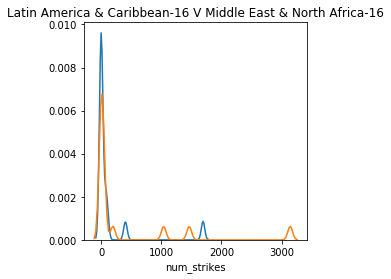

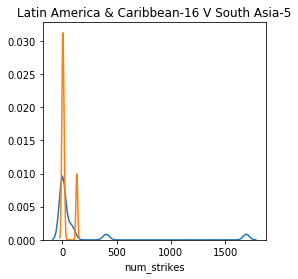

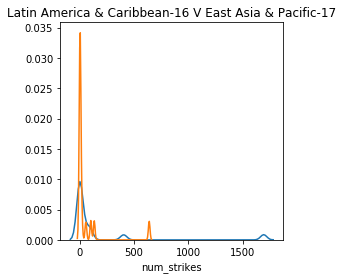

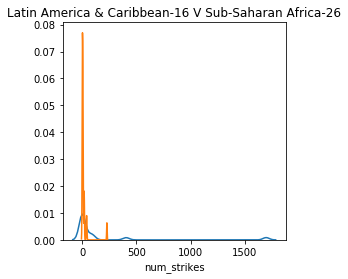

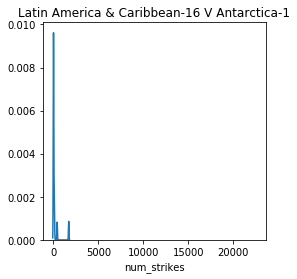

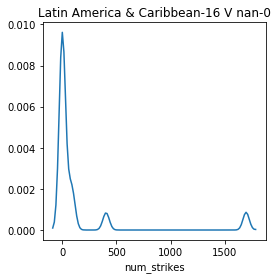

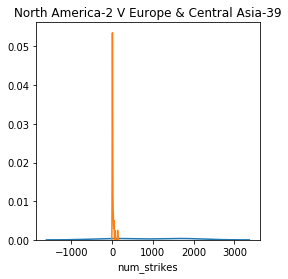

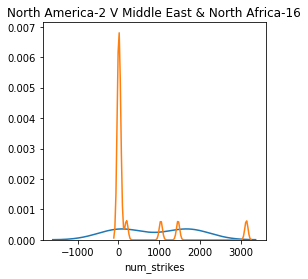

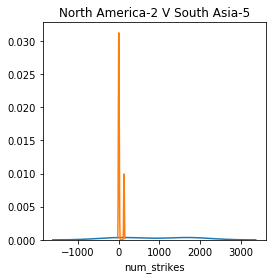

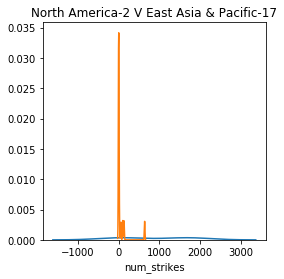

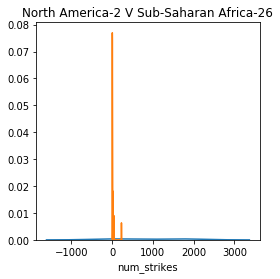

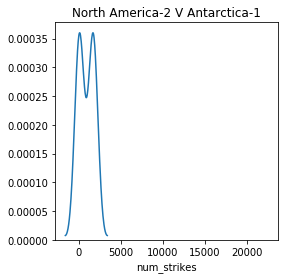

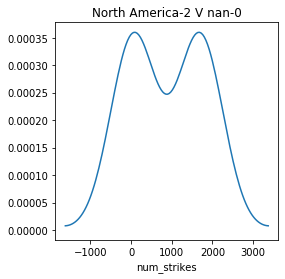

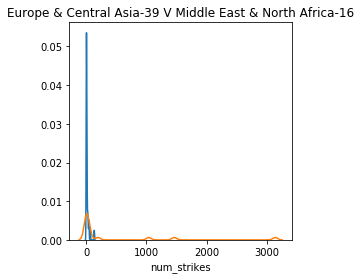

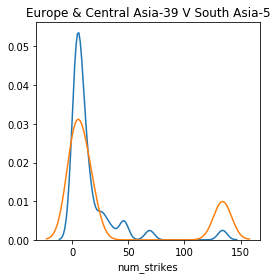

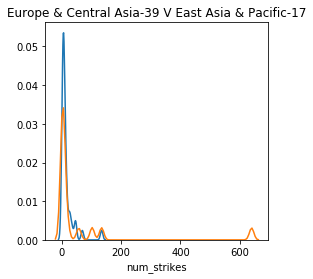

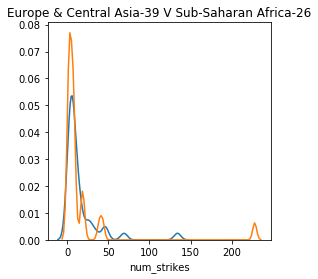

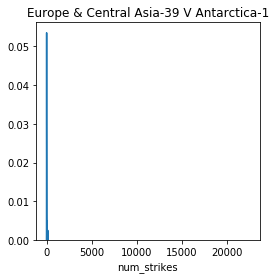

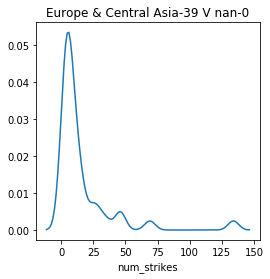

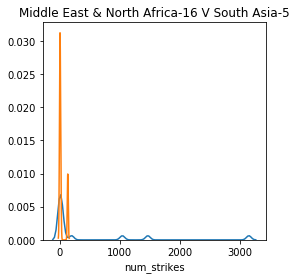

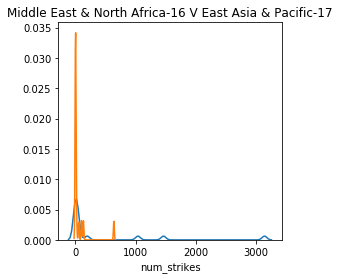

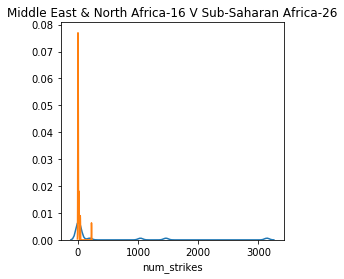

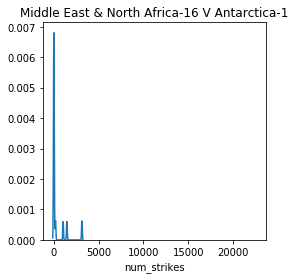

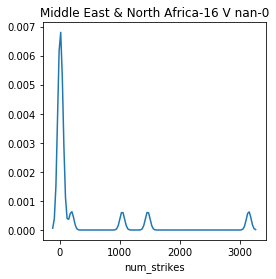

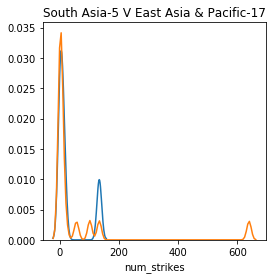

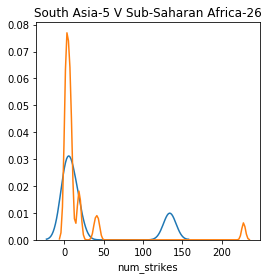

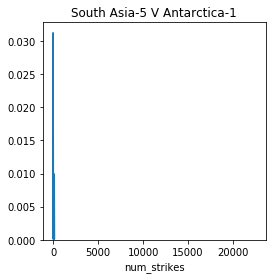

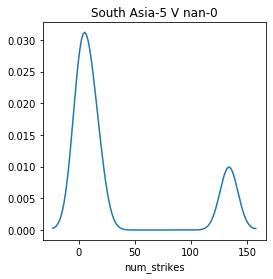

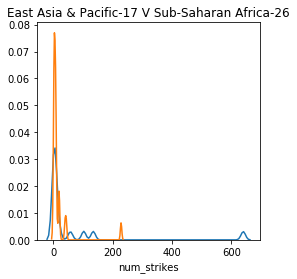

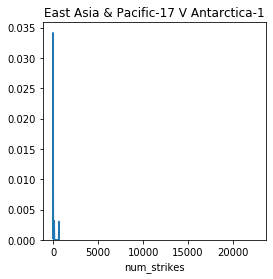

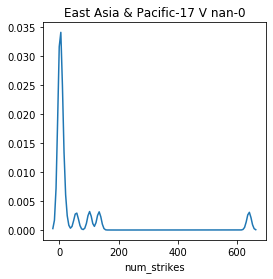

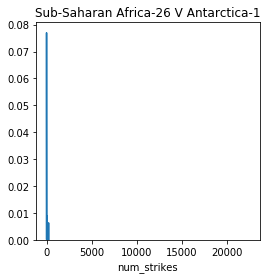

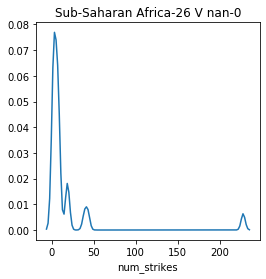

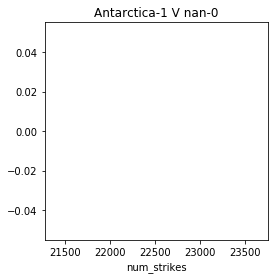

In [8]:
# fig = plt.figure(figsize=(20,20))

for i in range(len(samples)):
    for j in range(i + 1, len(samples)):
            samp1, samp2 = samples[i], samples[j]
            plt.figure(figsize=(4,4))
#             fig.add_subplot(3,3, i + 1)
            plt.title(f"{region[i]}-{len(samp1)} V {region[j]}-{len(samp2)}")
            sns.distplot(samp1, kde=True, hist=False)
            sns.distplot(samp2, kde=True, hist=False)